<a href="https://colab.research.google.com/github/roscibely/Sistemas-de-controle-Lab/blob/main/Tanques_acoplados_Quanser_Tanque_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Projeto de controlador em Python 


In [2]:
import numpy as np
import control as control
import matplotlib.pyplot as plt
from control.matlab import *           

### 1.1 Definindo a planta

Função de transferência em malha aberta para o sistema Tanque 1 dos tanques acoplados : 

 $$\frac{Y(s)}{R(s)}= \frac{K_{dc}}{\tau_1 s+1} $$

 com $K_{dc}=3.2$ e $\tau_1=15.2$. 

In [4]:
num=[3.2];            # numerador
d=[15.2,1];         # denominador
Ps=control.tf(num,d)# função transferência  
print('Sistema:',Ps)       

Sistema: 
   3.2
----------
15.2 s + 1



### 1.2 Sistema em malha fechada

In [5]:
Ts=feedback(Ps,1) 
print(Ts)


    3.2
------------
15.2 s + 4.2



### 1.3 Análise da função de transferência da planta com a função **sistool()**

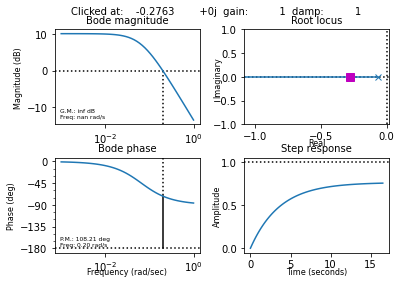

In [6]:
sisotool(Ps)  # Observe que estamos executando sisotool() considerando a 
              # função de transferencia em malha aberta (Ps)

### 1.4 Projeto do controlador para o nível 1 do tanque: alocação de polos

---

$s^2 + \frac{(1+3.2K_P)s}{15.2} + \frac{3.2K_I}{15.2}=0$

Resolvendo, temos: 

$K_P=\frac{2\zeta \omega 15.2-1}{3.2}$

$K_I=\frac{15.2\omega^2}{3.2} $

em que 
$\zeta=\frac{|ln(M_p/100)|}{\sqrt{ln(M_p/100)^2+\pi^2}}$
e 
$\omega=\frac{4}{\zeta t_s}$

Especificações:

 * O percentual de ultrapassagem deve ser: $Mp\leq 11\%$;
 * Tempo de acomodação de 2% deve ser inferior a 5 segundos, ou seja: $t_s < 5s$. 

In [58]:
ts=4
Mp = 11 #
zeta=-np.log(Mp/100)/np.sqrt(np.pi**2+(np.log(Mp/100))**2);
w=4/(zeta*ts)  
KI=(15.2*w**2)/3.2
print('KI=',KI)
Kp=(2*15.2*zeta-1)/3.2
print('Kp=',Kp)

KI= 14.372335611913698
Kp= 5.148934571318376


(array([-2.6883243 , -0.40322004]), array([-0.35825315]))

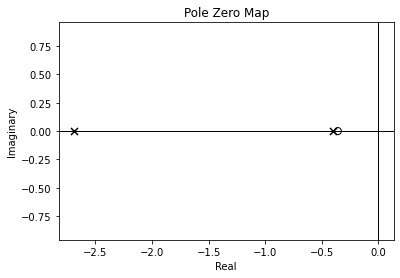

In [59]:
PI=control.tf([KI, Kp],[1, 0])
P=PI*Ps                  # Multiplicando a TF do controlador com planta 
FT=feedback(P,1)         # Controlador * sistema em malha fechada
pzmap(FT)  

Analisando os resultados 

{'Overshoot': 6.094819492445482,
 'Peak': 1.0625366633288318,
 'PeakTime': 1.7148626823657247,
 'RiseTime': 0.5830533120043464,
 'SettlingMax': 1.0625366633288318,
 'SettlingMin': 0.9144764575054319,
 'SettlingTime': 4.801615510624029,
 'SteadyStateValue': 1.0014972158037274,
 'Undershoot': 0.0}

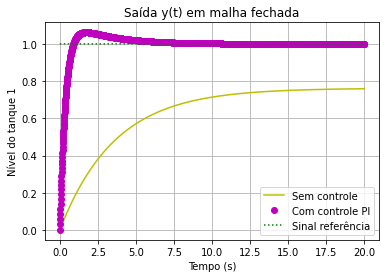

In [60]:
tf = 20.00                # Tempo de simulação em segundos 
dt = 0.01                 # step
T = np.arange(0, tf, dt)  # Vetor de tempos
r=np.ones(len(T))
saida_sem_K, t1 =step(Ts,T) # Saida com sistema em malha fechada (MF) sem Kp
saida_com_PI, t =step(FT,T) # Com PI
plt.plot(t,saida_sem_K, 'y')
plt.plot(t,saida_com_PI, 'mo')
plt.plot(t,r, 'g:')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível do tanque 1')
plt.title('Saída y(t) em malha fechada')
plt.grid(True)
plt.legend(['Sem controle','Com controle PI', 'Sinal referência'])
stepinfo(FT) 